<a href="https://colab.research.google.com/github/yash5891/Machine-Learning-Assignments/blob/main/Assignment__KNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Ads:

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

***Data Loading***

In [ ]:
data = pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.isnull().sum() #No null value

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
social.shape #size of data

(400, 5)

# Data visualization

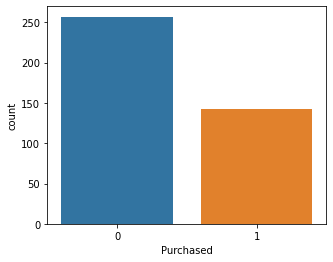

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Purchased', data=data)
plt.show()

***Observation***:
    
    - Not purchased(near to 250)>purchased(near to 150)

In [ ]:
not_purchased = data.groupby('Purchased')['Purchased'].count()[0]
purchased = data.groupby('Purchased')['Purchased'].count()[1]


pur = dict(data.Purchased.value_counts())
pur

print(f'{not_purchased} people did not purchased and {purchased} people purchased')

257 people did not purchased and 143 people purchased


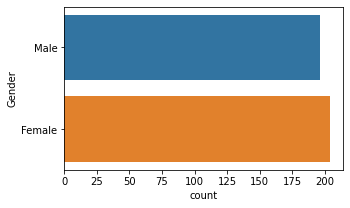

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(y='Gender', data=data)
plt.show()

***Observation***:

 -   Distribution of Male and Female gender is nearly equal

In [ ]:
gen = dict(data.Gender.value_counts())
gen

{'Female': 204, 'Male': 196}

In [ ]:
data.Age.value_counts()

35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

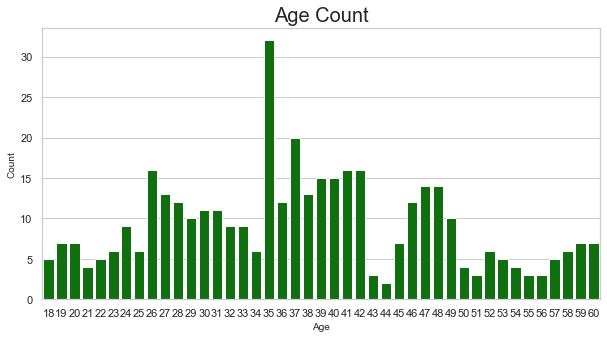

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.countplot(data['Age'],color='green')
plt.title('Age Count', size=20)
plt.xlabel('Age',size=10)
plt.ylabel('Count',size=10)
plt.show()

***Observation***:

 - Mostly 35 years old people are engage with social network ads
 - less engagement in social network ads seen in age 44 people

    

In [ ]:
pur_age = dict(social.groupby(['Purchased','Age'])['Purchased'].count()[1])

In [ ]:
age__=social.groupby(['Purchased','Age'])['Purchased'].count()
age__

Purchased  Age
0          18     5
           19     7
           20     7
           21     4
           22     5
                 ..
1          56     3
           57     5
           58     6
           59     5
           60     7
Name: Purchased, Length: 70, dtype: int64

In [ ]:
df1=data[data['Purchased']==1]


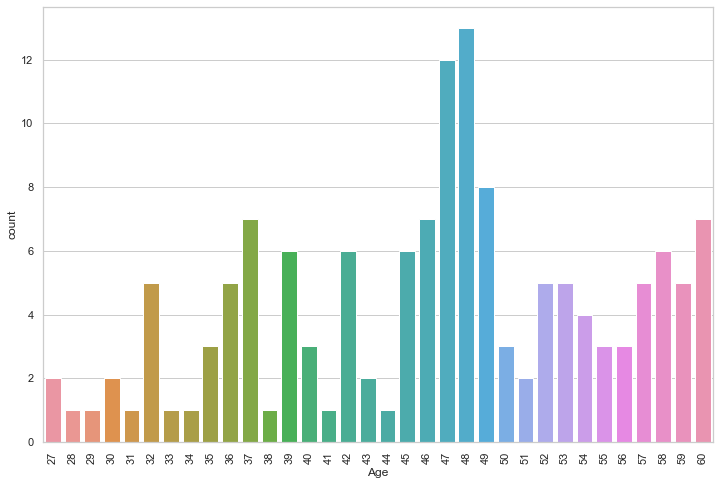

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df1['Age'])
plt.xticks(rotation=90)
plt.show()

***Observation***

 -  From this graph we can observe that 48 year old people purchased more ads
 -  From 27 year old to 60 year old are purchasing ads...so this is our target group
 -  But we have to focus more on age group of 45-49 old

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

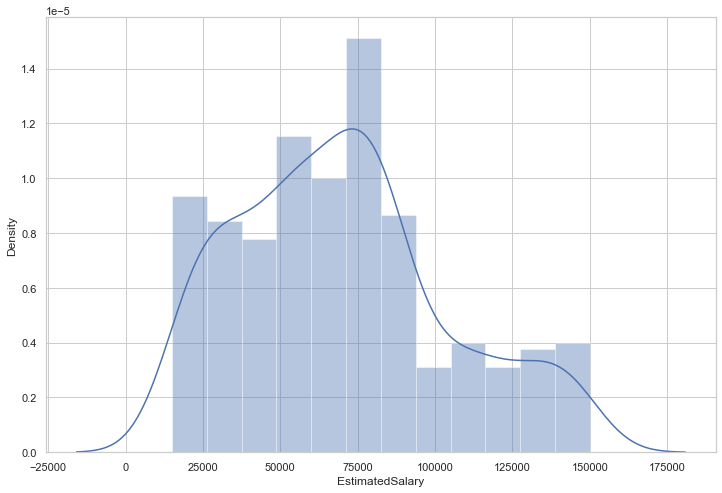

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data["EstimatedSalary"])


***Observation***:
    
    -positively skewed graph
    -Most estimated salary between 20000 to 100000
    -less estimated salary between 10000 to 150000
    -very less estimated salary is less than 20000 annd greater than 150000

<AxesSubplot:xlabel='Age', ylabel='Density'>

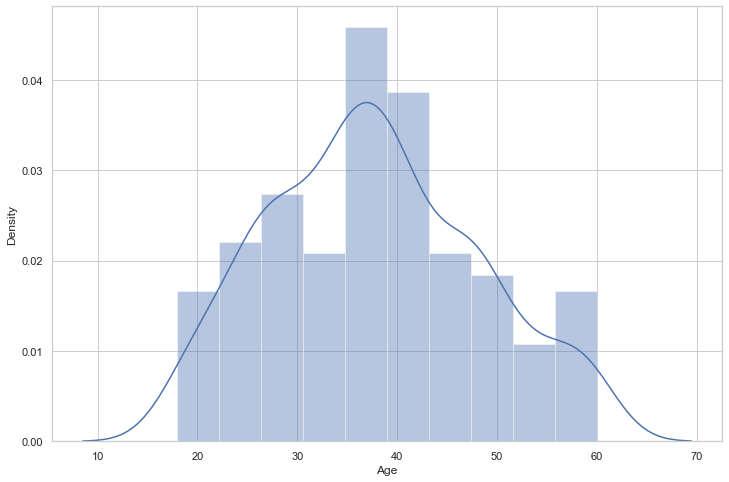

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data["Age"])

***Observation***:
    
   -    Symmetric distribution
    
   - 35 to 45 age people are more on social network

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

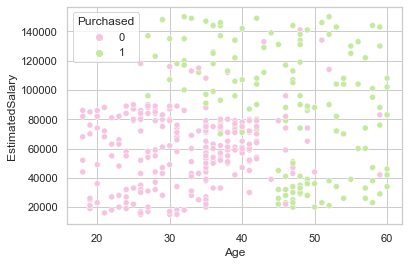

In [ ]:
sns.scatterplot(x = 'Age',y = 'EstimatedSalary', data =data, hue = 'Purchased', palette ='PiYG')

***Observations***:

  - From this Scatterplot we can see people distributed in Purchased and non-puchased group
  - most of people who are not purchaing belong to less salary(<80000) and age less than 40
  - most of people who are purchasing belong to age group having age more than 40 eventhough salary is less or more

In [ ]:
data['Male']=pd.get_dummies(data['Gender'],drop_first=True)

In [ ]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [ ]:
data.drop(['User ID','Gender'], axis=1, inplace=True)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


<AxesSubplot:>

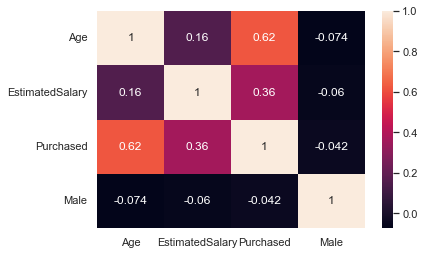

In [ ]:
sns.heatmap(data.corr(),annot=True)

# Data splitting

In [ ]:
y = data['Purchased']
x = data.drop(['Purchased'],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0 )#train-test-split

# Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

# Evaluation metrics

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

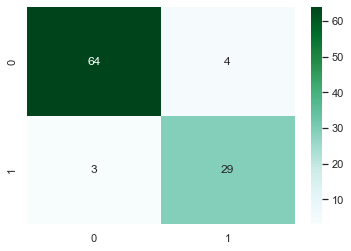

In [ ]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



## Interpretaion:

  - Accuracy is 93%
  - precision 96%
  - recall 94 %
  - f1 score is 95 %
  
  accuracy is quite good

***To check the presence  overfitting***

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Perform K-fold cross-validation
cv_results = cross_val_score(knn, x, y, cv=kfold, scoring='accuracy')
cv_results.mean()

0.8024351924587588

**Interpretation**:

 - model accuracy before cross validation is greater which is 93% but after cross validation it decreases(80%)
 - so,here is overfitting
  - Accuracy afer cross validation is 80% which is good

**In KNN Choice of k is very critical. A small value of k means that noise will have a higher influence on the result. A large value makes it computationally expensive and is contradictory to the basic idea behind KNN, that close points might have similar densities or classes.The default parameter for the number of neighbors k is 5.**



In [ ]:
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

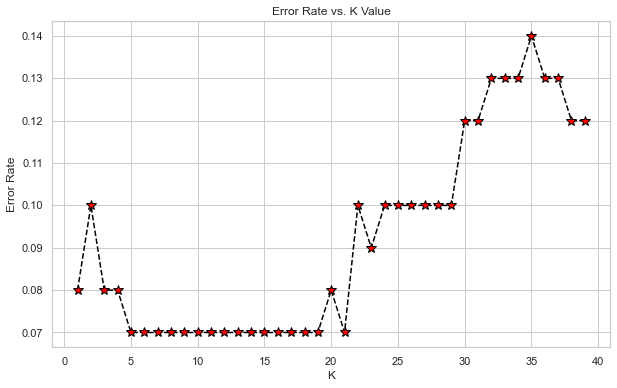

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', marker='*',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Interpretaion:**
    
    -  K=5 to K=18 we have less error rate
    -  but for K=35 maximum error rate

WITH K=15


[[64  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100





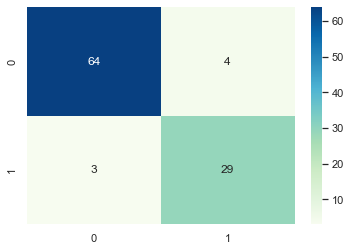

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=15)

knn1.fit(x_train,y_train)
pred1 = knn1.predict(x_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred1))
sns.heatmap(confusion_matrix(y_test,pred1), annot=True, fmt='d', cmap='GnBu')
print('\n')
print(classification_report(y_test,pred1))
print('\n')

 **Interpretaion**:
    
   -   The result of K=5 and K=15 are same

## Conclusion:

  - We build KNN model on social network ad dataset with initial accuracy of 93% percent
  - This high accuracy cause the doubt of overfitting in data
  - so after cross validataion we get 80% accuracy  this implies that there is overfitting in data
  - but after cross validation we get 80% accuracy which is also good
  - so our model correctly predicting result with 80% accuracy
  - This dataset is related to social network ad so that much accuray is also perfect for classification
  